In [33]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
data1 = pd.read_csv('C:/Data_Science/Personal_Notebooks/Fertilizer_classification/train.csv')
data2 = pd.read_csv('C:/Data_Science/Personal_Notebooks/Fertilizer_classification/test.csv')

train_df = data1.copy()
test_df = data2.copy()

print("First 3 rows of train_df: \n", train_df.head(3))
print("First 3 rows of test_df: \n", test_df.head(3))

First 3 rows of train_df: 
    id  Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36    Clayey  Sugarcane        36   
1   1           27        69        65     Sandy    Millets        30   
2   2           29        63        32     Sandy    Millets        24   

   Potassium  Phosphorous Fertilizer Name  
0          4            5           28-28  
1          6           18           28-28  
2         12           16        17-17-17  
First 3 rows of test_df: 
        id  Temparature  Humidity  Moisture Soil Type    Crop Type  Nitrogen  \
0  750000           31        70        52     Sandy        Wheat        34   
1  750001           27        62        45       Red    Sugarcane        30   
2  750002           28        72        28    Clayey  Ground Nuts        14   

   Potassium  Phosphorous  
0         11           24  
1         14           15  
2         15            4  


In [35]:
#function to make the columns snake_case
import re

def to_snake_case(df):
    def convert(name):
        #lower case
        name = name.lower()
        # Replace spaces and hyphens with underscores
        name = re.sub(r'[\s\-]+', '_', name)
        # Add underscore before capital letters (except at the beginning)
        name = re.sub(r'(?<!^)(?=[A-Z])', '_', name)
        # Convert to lowercase
        return name.lower()

    df.columns = [convert(col) for col in df.columns]
    return df

In [36]:
to_snake_case(train_df)
to_snake_case(test_df)

,id,temparature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14
...,...,...,...,...,...,...,...,...,...
249995,999995,26,66,30,Red,Sugarcane,14,7,18
249996,999996,33,62,55,Red,Pulses,28,14,7
249997,999997,36,53,64,Black,Paddy,28,11,27
249998,999998,36,67,26,Clayey,Paddy,33,0,10


In [37]:
train_df.shape, test_df.shape

((750000, 10), (250000, 9))

In [38]:
train_df.columns

Index(['id', 'temparature', 'humidity', 'moisture', 'soil_type', 'crop_type',
       'nitrogen', 'potassium', 'phosphorous', 'fertilizer_name'],
      dtype='object')

In [39]:
print("Unique names of fertilizers: \n ", train_df['fertilizer_name'].unique())
print("Count of unique fertilizers: \n", train_df['fertilizer_name'].nunique())

print("Unique names of soil types: \n ", train_df['soil_type'].unique())
print("Count of unique soil types: \n", train_df['soil_type'].nunique())

print("Unique names of crop types: \n ", train_df['crop_type'].unique())
print("Count of unique crop types: \n", train_df['crop_type'].nunique())
 

Unique names of fertilizers: 
  ['28-28' '17-17-17' '10-26-26' 'DAP' '20-20' '14-35-14' 'Urea']
Count of unique fertilizers: 
 7
Unique names of soil types: 
  ['Clayey' 'Sandy' 'Red' 'Loamy' 'Black']
Count of unique soil types: 
 5
Unique names of crop types: 
  ['Sugarcane' 'Millets' 'Barley' 'Paddy' 'Pulses' 'Tobacco' 'Ground Nuts'
 'Maize' 'Cotton' 'Wheat' 'Oil seeds']
Count of unique crop types: 
 11


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   temparature      750000 non-null  int64 
 2   humidity         750000 non-null  int64 
 3   moisture         750000 non-null  int64 
 4   soil_type        750000 non-null  object
 5   crop_type        750000 non-null  object
 6   nitrogen         750000 non-null  int64 
 7   potassium        750000 non-null  int64 
 8   phosphorous      750000 non-null  int64 
 9   fertilizer_name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [41]:
train_df.isnull().sum(), test_df.isnull().sum()

(id                 0
 temparature        0
 humidity           0
 moisture           0
 soil_type          0
 crop_type          0
 nitrogen           0
 potassium          0
 phosphorous        0
 fertilizer_name    0
 dtype: int64,
 id             0
 temparature    0
 humidity       0
 moisture       0
 soil_type      0
 crop_type      0
 nitrogen       0
 potassium      0
 phosphorous    0
 dtype: int64)

## Checking distribution for categorical values

In [42]:
soil_count = train_df['soil_type'].value_counts()
soil_count = soil_count.reset_index()

crop_count = train_df['crop_type'].value_counts()
crop_count = crop_count.reset_index()

fertilizer_count = train_df['fertilizer_name'].value_counts()
fertilizer_count = fertilizer_count.reset_index()

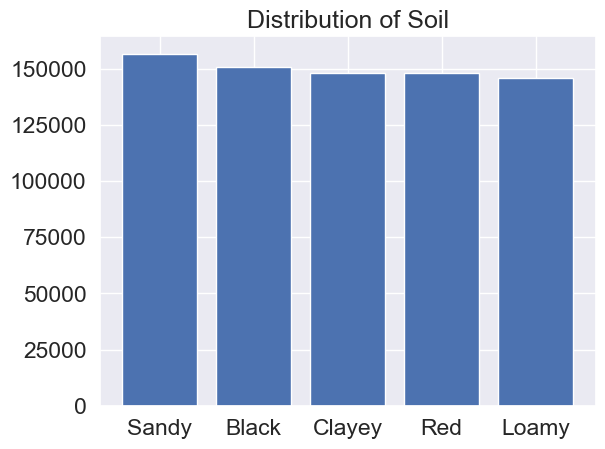

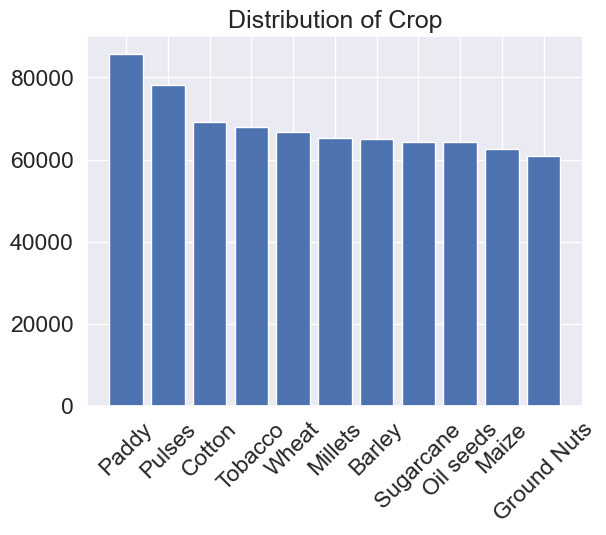

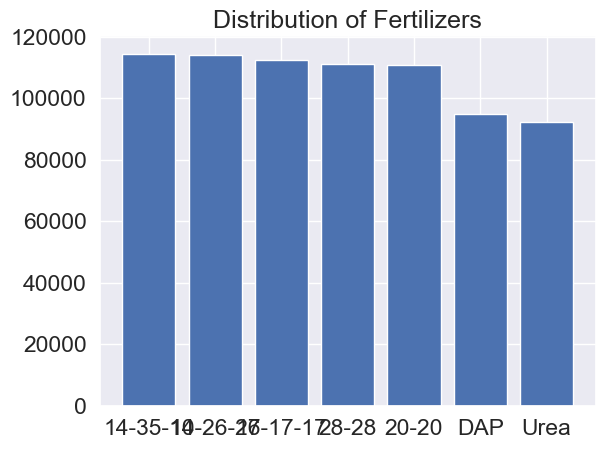

In [43]:
plt.bar(soil_count['soil_type'], soil_count['count'])
plt.title("Distribution of Soil")
# Show graphic
plt.show()

plt.bar(crop_count['crop_type'], crop_count['count'])
plt.xticks(rotation = 45)
plt.title("Distribution of Crop")
# Show graphic
plt.show()

plt.bar(fertilizer_count['fertilizer_name'], fertilizer_count['count'])
plt.title("Distribution of Fertilizers")
# Show graphic
plt.show()



### Results

Distribution is not linear. These features might be eligible for resampling.

## Checking Distributions

In [44]:
num = train_df.select_dtypes(include='number')
cat = train_df.select_dtypes(exclude='number')

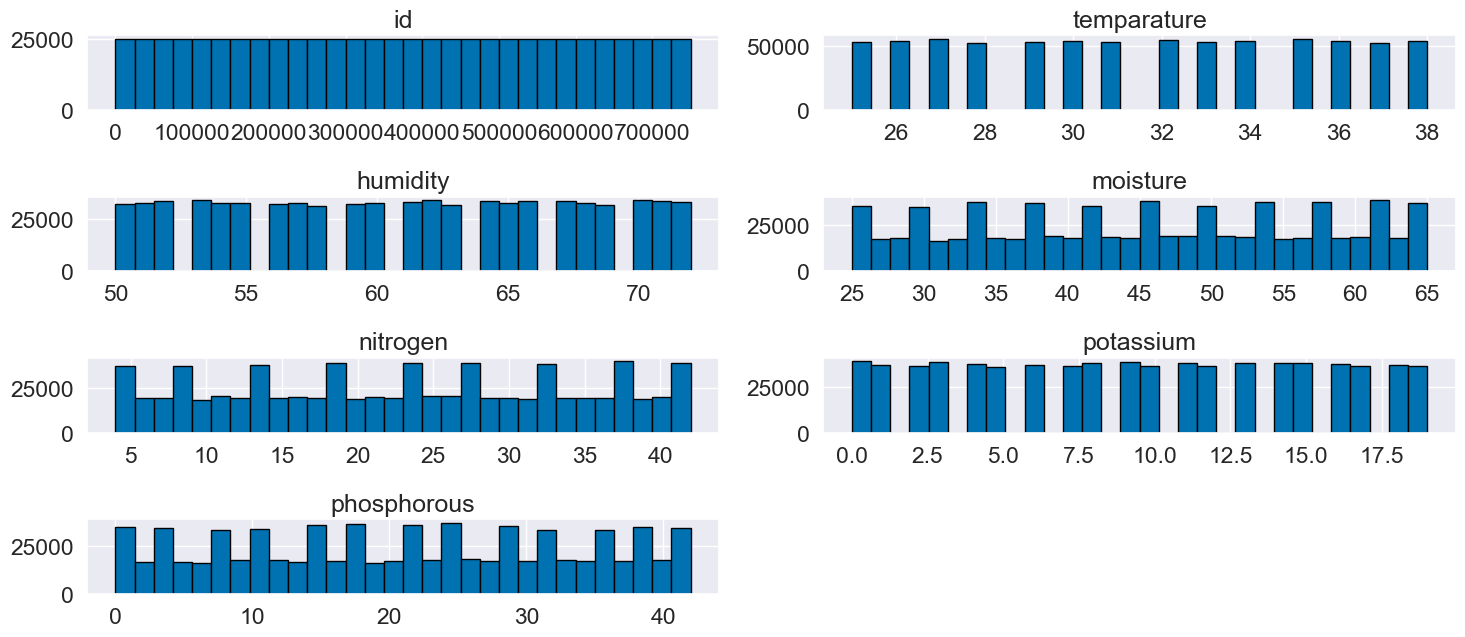

In [45]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

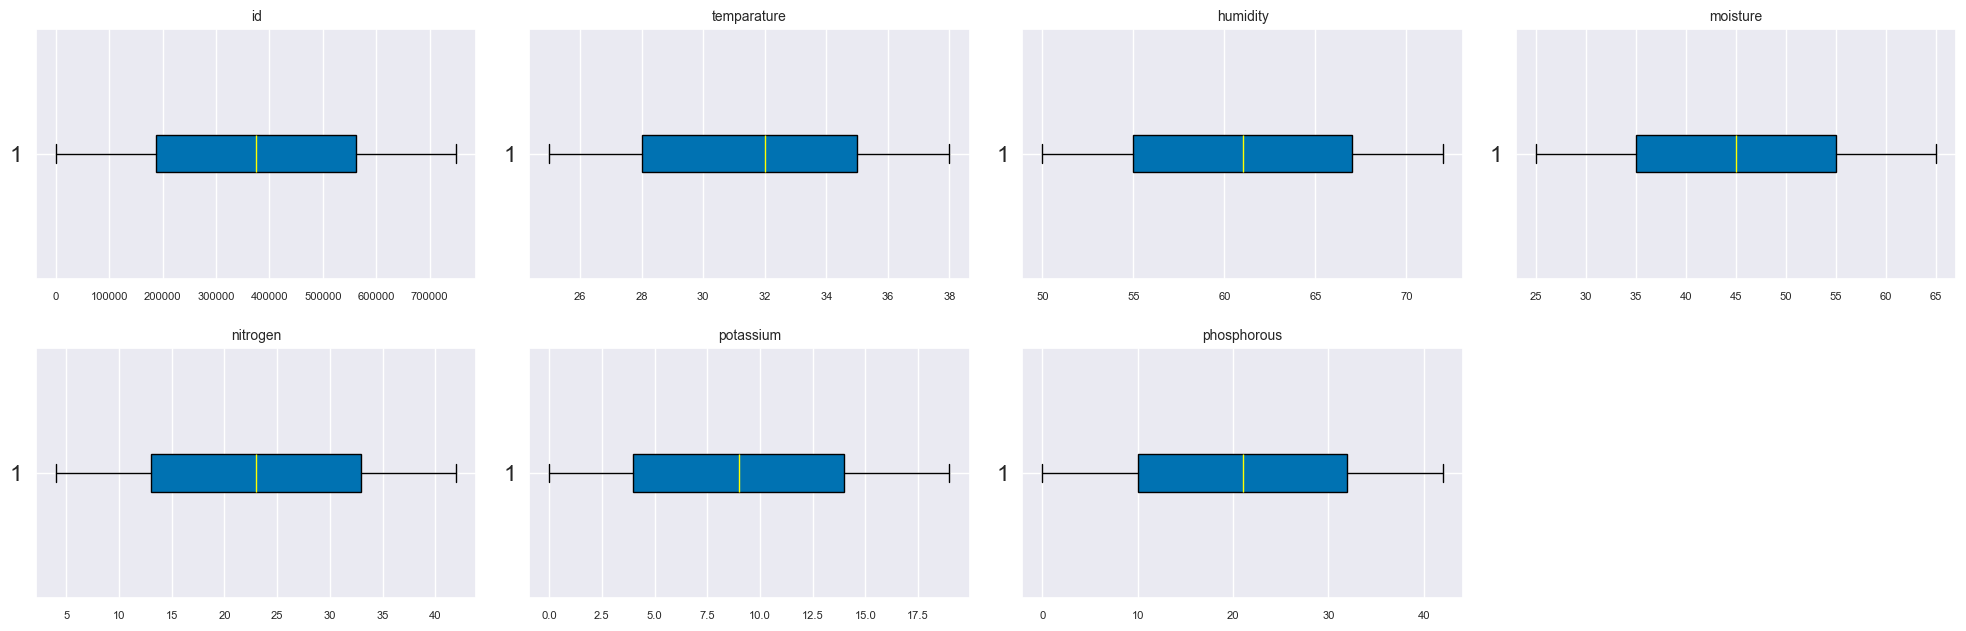

In [46]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

### Results

Distribution of numerical values is linear. No further change required.

## LabelEncoding categorical features

In [47]:
cat.columns

Index(['soil_type', 'crop_type', 'fertilizer_name'], dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df['soil_type'] = le.fit_transform(train_df['soil_type'])
train_df['crop_type'] = le.fit_transform(train_df['crop_type'])
train_df['fertilizer_name'] = le.fit_transform(train_df['fertilizer_name'])

In [49]:
id_placeholder = train_df['id']
train_df = train_df.drop(columns='id') #no statistical value

## Correlation Matrix

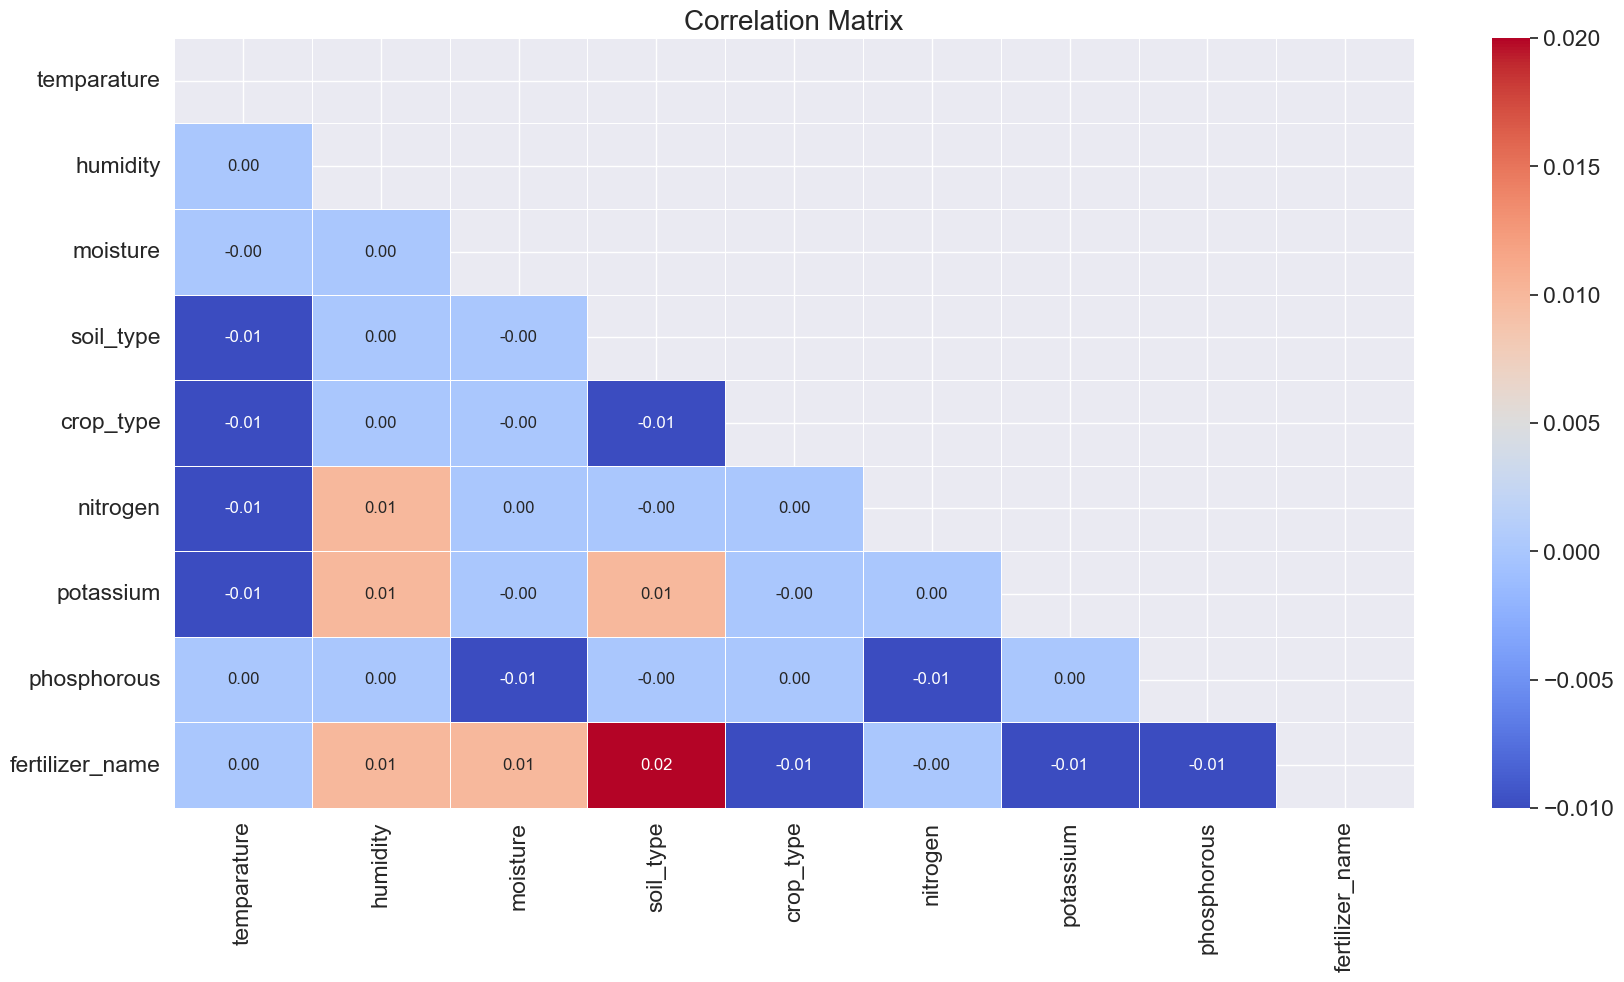

In [50]:
num_corr = round(train_df.corr(), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set_theme(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Matrix", fontsize=20) # add title
plt.show()

The correlation matrix shows low correlation between target and features.

I'm going to use RandomForestClassifier and SHAPE to determine which features are more important to the classification and therefore reducing redundancy.

## Finding important features with RandomForestClassifier

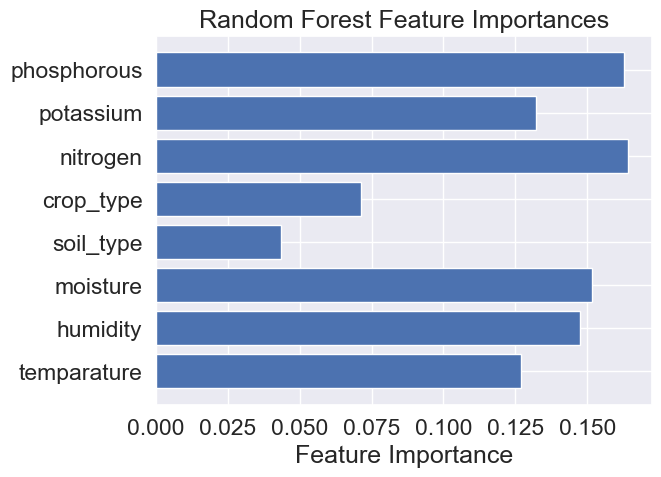

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = train_df.drop(columns='fertilizer_name')
y = train_df['fertilizer_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

importance = clf.feature_importances_

# Plot importances
import matplotlib.pyplot as plt
feat_names = X_train.columns
plt.barh(feat_names, importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

### Results

RandomForestClassifier has selected phosphorous, nitrogen, moisture and humidity as more important for classification.

## Finding important Features with Permutation_Importance

In [52]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_test, y_test, n_repeats= 10, random_state= 42)
sorted_importance = pd.Series(result.importances_mean, index= X_test.columns).sort_values(ascending= False)

In [53]:
sorted_importance

crop_type      0.008523
phosphorous    0.007011
nitrogen       0.005479
moisture       0.005368
soil_type      0.004933
potassium      0.004594
humidity       0.003623
temparature    0.003092
dtype: float64

### Results

According to the permutation importance the less important features for the RandomForest model are humidity and temperature.

I'm going to train the baseline models with all of the features and then apply feature engineering.

## Baseline models

In [54]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

In [55]:
#classification issues
def train_and_eval_models(X_train, X_test, y_train, y_test):

    #models to test
    models = {
        "Logistic Regression" : LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
        "Random Forest" : RandomForestClassifier(),
        "XGB" : XGBClassifier()
    }

    print("Starting the training process.")

    #list to store results

    results = []

    #scaling data just for LogisticRegression

    for name, model in models.items():
        if name in ['Logistic Regression']:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            print(f"Features scaled for model {name}")

        print(f"Training model: {name}")

        model.fit(X_train_scaled, y_train)

        y_train_predict = model.predict(X_train_scaled) #to test accuracy on the train dataframe
        y_test_predict = model.predict(X_test_scaled)

        results.append({
            "Model" : name,
            "Train Accuracy" : accuracy_score(y_train, y_train_predict),
            "Test Accuracy" : accuracy_score(y_test, y_test_predict),
            "Train Precision" : precision_score(y_train, y_train_predict, average = 'weighted'),
            "Test Precision" : precision_score(y_test, y_test_predict, average = 'weighted'),
            "Train F1 Score" : f1_score(y_train, y_train_predict, average = 'weighted'),
            "Test F1 Score" : f1_score(y_test, y_test_predict, average = 'weighted')
        })

    #Convering result into a df
    results_df = pd.DataFrame(results)
    print("\n Model Performance Summary: ")
    print(results_df)
    

    return results_df


In [56]:
results_df = train_and_eval_models(X_train, X_test, y_train, y_test)

Starting the training process.
Features scaled for model Logistic Regression
Training model: Logistic Regression
Training model: Random Forest
Training model: XGB

 Model Performance Summary: 
                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regression        0.157084       0.156898         0.117335   
1        Random Forest        1.000000       0.166240         1.000000   
2                  XGB        0.257619       0.193822         0.260459   

   Test Precision  Train F1 Score  Test F1 Score  
0        0.117345        0.127360       0.127280  
1        0.164580        1.000000       0.163612  
2        0.193220        0.253192       0.189443  


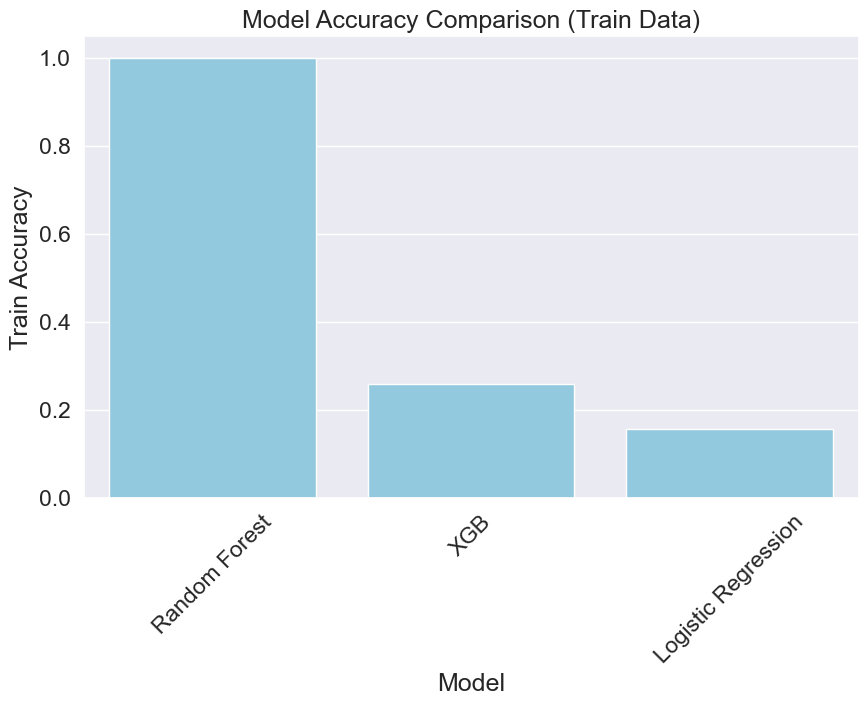

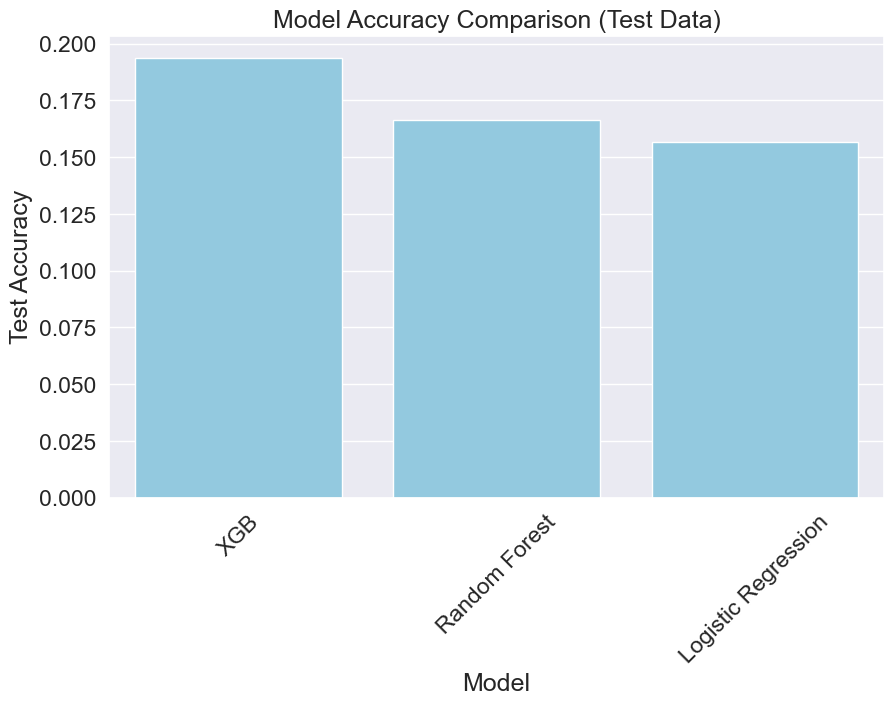

In [57]:
#plotting the results

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Train Accuracy", data=results_df.sort_values(by='Train Accuracy', ascending=False), color='skyblue')
plt.title("Model Accuracy Comparison (Train Data)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Test Accuracy", data=results_df.sort_values(by='Test Accuracy', ascending=False), color='skyblue')
plt.title("Model Accuracy Comparison (Test Data)")
plt.xticks(rotation=45)
plt.show()

### Results

The baseline models are not performing well without feature engineering with XGB reaching 17.5% on unseen data.

Feature engineering is going to be applied on a second notebook.